In [6]:
from fastccm import PairwiseCCM, utils, ccm_utils
from fastccm.data import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statistics

In [23]:

def time_ccm_computation(X_emb, Y_emb, trials=3, device="cpu", method="simplex"):
    
    torch.cuda.empty_cache()
    ccm = PairwiseCCM(device=device) 

    start_time = time.time()
    for _ in range(trials):
        ccm.compute(X_emb, Y_emb, library_size=1600, sample_size=550, exclusion_window=30, tp=0, method=method, nbrs_num=10, theta=5, )
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair


In [24]:
timeseries_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300]

In [25]:
X_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 5))
Y_emb = np.random.uniform(size=(max(timeseries_counts), 100000, 1))

In [26]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="simplex")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 13.959328ms, Time per pair = 13.959328ms
N_sys=2: Avg time = 21.169027ms, Time per pair = 5.292257ms
N_sys=5: Avg time = 20.314058ms, Time per pair = 0.812562ms
N_sys=10: Avg time = 28.681278ms, Time per pair = 0.286813ms
N_sys=15: Avg time = 36.983013ms, Time per pair = 0.164369ms
N_sys=20: Avg time = 43.984969ms, Time per pair = 0.109962ms
N_sys=30: Avg time = 60.795069ms, Time per pair = 0.067550ms
N_sys=50: Avg time = 94.731728ms, Time per pair = 0.037893ms
N_sys=100: Avg time = 194.615682ms, Time per pair = 0.019462ms
N_sys=150: Avg time = 335.272312ms, Time per pair = 0.014901ms
N_sys=200: Avg time = 484.255314ms, Time per pair = 0.012106ms
N_sys=300: Avg time = 872.904619ms, Time per pair = 0.009699ms


In [6]:

results_cuda = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 83.958705ms, Time per pair = 83.958705ms
N_sys=2: Avg time = 3.292561ms, Time per pair = 0.823140ms
N_sys=5: Avg time = 6.011168ms, Time per pair = 0.240447ms
N_sys=10: Avg time = 10.685921ms, Time per pair = 0.106859ms
N_sys=15: Avg time = 16.455253ms, Time per pair = 0.073134ms
N_sys=20: Avg time = 21.568060ms, Time per pair = 0.053920ms
N_sys=30: Avg time = 28.666178ms, Time per pair = 0.031851ms
N_sys=50: Avg time = 37.789583ms, Time per pair = 0.015116ms
N_sys=100: Avg time = 101.702849ms, Time per pair = 0.010170ms
N_sys=150: Avg time = 179.505905ms, Time per pair = 0.007978ms
N_sys=200: Avg time = 243.777990ms, Time per pair = 0.006094ms
N_sys=300: Avg time = 314.664602ms, Time per pair = 0.003496ms


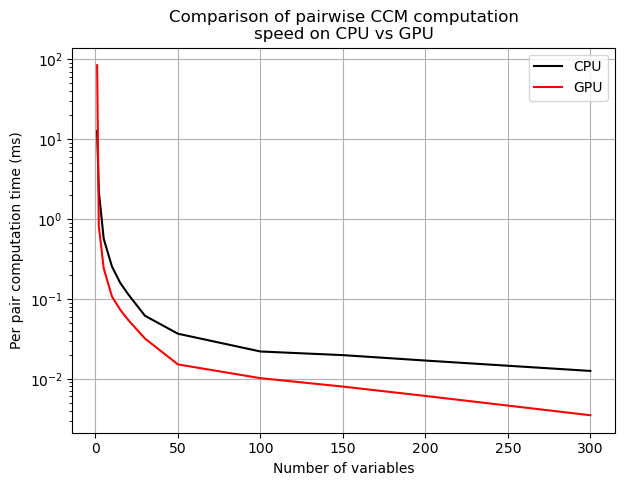

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (simplex)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [10]:
timeseries_counts = [1, 2, 5, 10, 15, 20]

In [11]:

results_cpu = []
for count in timeseries_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu",method="smap")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 26.901325ms, Time per pair = 26.901325ms
N_sys=2: Avg time = 73.496977ms, Time per pair = 18.374244ms
N_sys=5: Avg time = 364.391247ms, Time per pair = 14.575650ms
N_sys=10: Avg time = 1452.601353ms, Time per pair = 14.526014ms
N_sys=15: Avg time = 4012.495359ms, Time per pair = 17.833313ms
N_sys=20: Avg time = 7557.129383ms, Time per pair = 18.892823ms


In [ ]:
plt.figure(figsize=(7,5))
plt.title("Comparison of pairwise CCM computation\nspeed on CPU vs GPU (SMap)")
plt.plot(timeseries_counts, results_cpu, color="black", label="CPU")
plt.plot(timeseries_counts, results_cuda, color="red", label="GPU")
plt.yscale("log")
plt.xlabel("Number of variables")
plt.ylabel("Per pair computation time (ms)")
plt.legend()
plt.grid()

In [15]:
torch.cuda.get_device_name()

'NVIDIA RTX 3500 Ada Generation Laptop GPU'